The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In [108]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [109]:
nobel_data= pd.read_csv('data/nobel.csv')

print(list(nobel_data.columns.values))

#Most commonly awarded gender and birth country

top_gender= nobel_data['sex'].value_counts().index[0]

top_country= nobel_data['birth_country'].value_counts().index[0]


['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'sex', 'organization_name', 'organization_city', 'organization_country', 'death_date', 'death_city', 'death_country']


2000


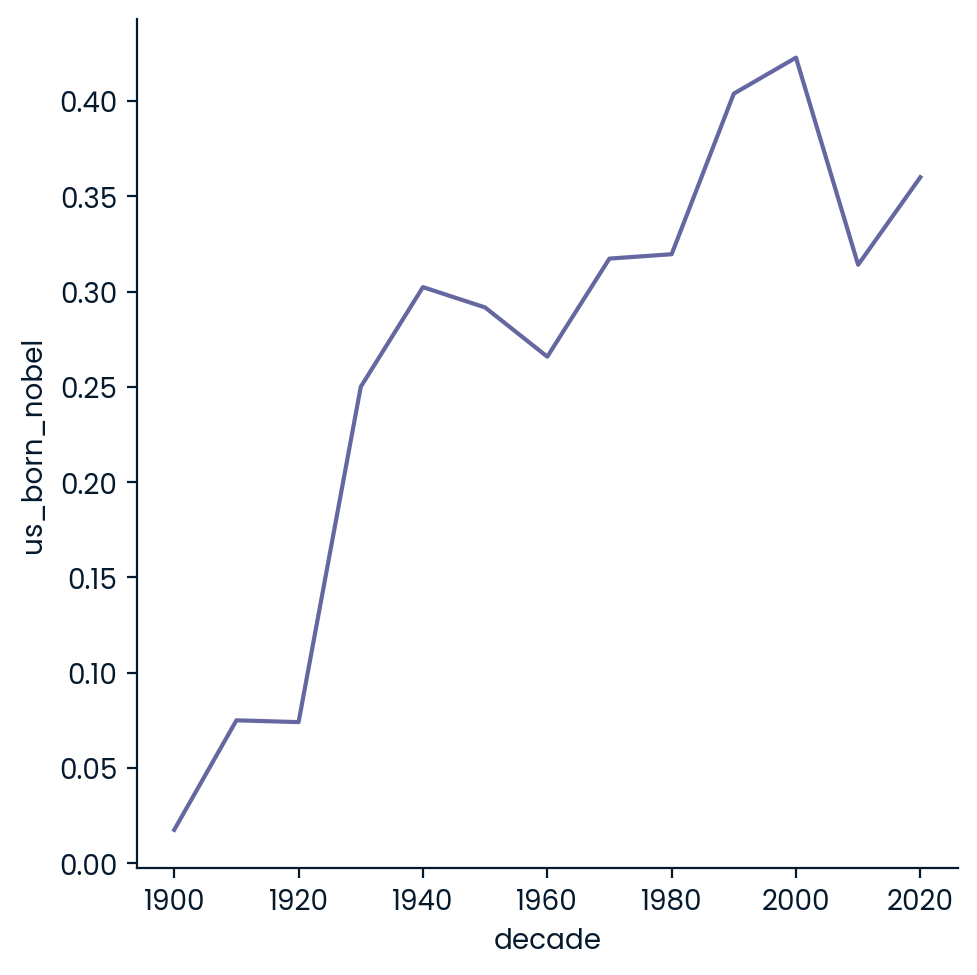

In [110]:
#Indentifying highest proportion of US born nobel prize winners based on decades

#Categorize the USA born winner 
nobel_data['us_born_nobel'] = nobel_data['birth_country']=="United States of America"

#Categorzie the decade
decade_floor= np.floor(nobel_data['year']/10)*10
decade_int= decade_floor.astype(int)

nobel_data['decade']= decade_int

#Identify the decade with max proportion of USA born winner 

us_win_ratio= nobel_data.groupby('decade', as_index=False)['us_born_nobel'].mean()

max_decade_usa = us_win_ratio[us_win_ratio['us_born_nobel']== us_win_ratio['us_born_nobel'].max()]['decade'].values[0]

print(max_decade_usa)

#Plotting prop of US winners in various decades
sns.relplot(x='decade', y='us_born_nobel', data=us_win_ratio, kind="line")
plt.show()

{2020: 'Literature'}


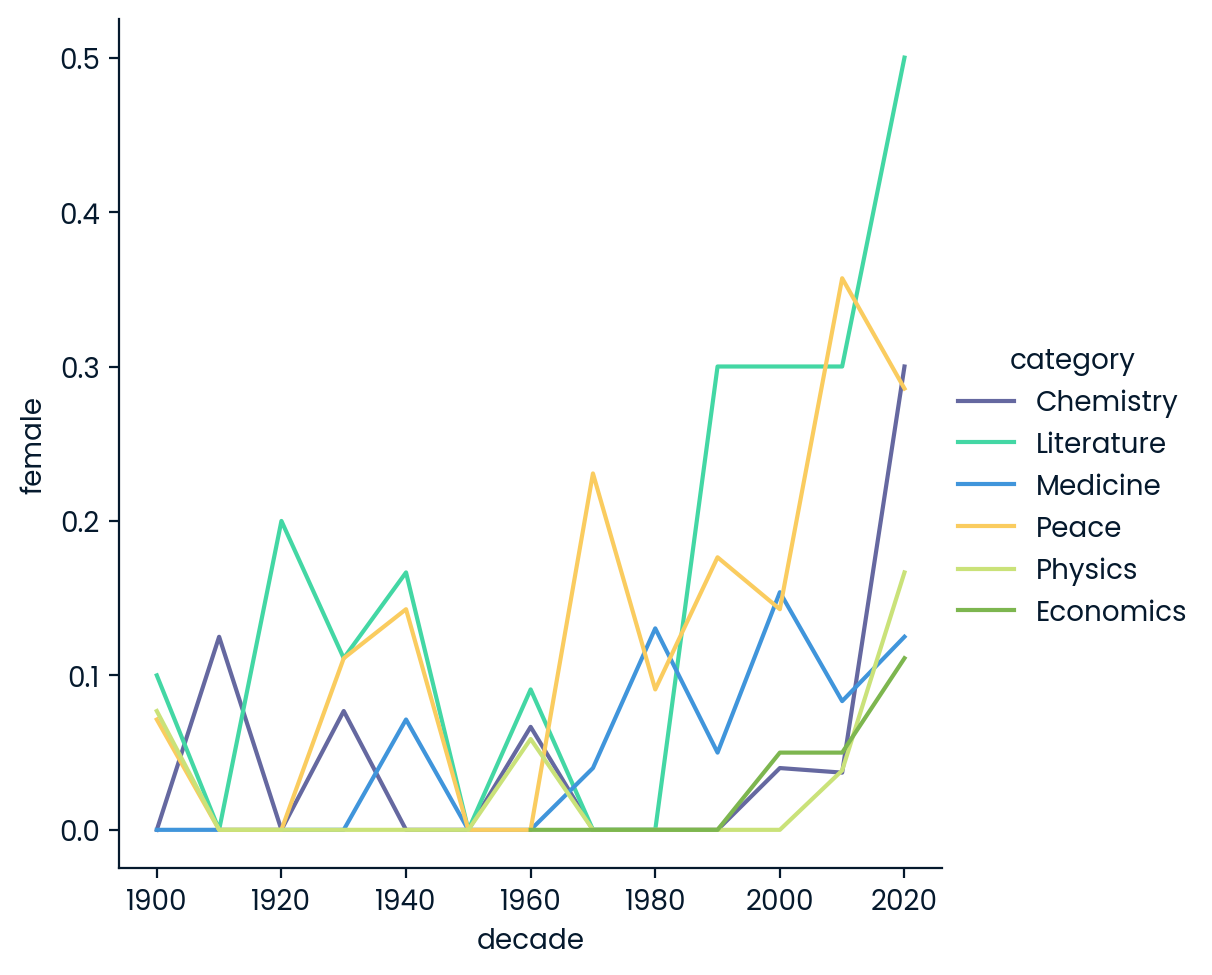

In [111]:
#highest proportion of female laureates based on decade and category combination

#Creating new column female
nobel_data['female']= nobel_data["sex"]== "Female"

#Creating DataFrame based on Decade and Category of female only
female_prop= nobel_data.groupby(['decade', 'category'], as_index=False)['female'].mean()

#Filtering max proportion of female in the dataframe
max_female_winner = female_prop[female_prop['female']== female_prop['female'].max()]

# Creating a dict of the decade and category of max prop of female winners
max_female_dict = {max_female_winner['decade'].values[0]:max_female_winner['category'].values[0]}
print(max_female_dict)

#Plotting prop of female winners vs decade with different categories
sns.relplot(x='decade',y='female', data=female_prop, kind="line", hue='category')
plt.show()

In [112]:
#Finding first woman to receive nobel prize and the category

#Filtering dataframe for female only 
female_win_df = nobel_data[nobel_data['female']==True]

#Result
female_first_year= female_win_df[female_win_df['year']== female_win_df['year'].min()]
first_woman_name= female_first_year['full_name'].values[0]
first_woman_category = female_first_year["category"].values[0]
print(f"\n The first woman to receive nobel prize was {first_woman_name} in the category of {first_woman_category}.")
nobel_data.head()


 The first woman to receive nobel prize was Marie Curie, née Sklodowska in the category of Physics.


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,us_born_nobel,decade,female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [113]:
#Count the wins of each laureate_id
win_count = nobel_data.groupby('laureate_id', as_index=False)['full_name'].value_counts()

#Filter the list for more than 1 wins and return the list of full names
repeat_list= list(win_count[win_count['count']>1]['full_name'])
print("The multiple winners of nobel prize are:", repeat_list)



The multiple winners of nobel prize are: ['Marie Curie, née Sklodowska', 'John Bardeen', 'Linus Carl Pauling', 'Frederick Sanger', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
